In [1]:
import numpy as np
import torch
from torch import nn
from matplotlib import pyplot as plt
import pandas as pd

##### 数据预处理

In [2]:
data = pd.read_csv("./dataset/Income1.csv")

In [3]:
X    = torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))

In [4]:
Y    = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

##### 分解写法

In [5]:
w    = torch.randn(1,1,requires_grad=True)
b    = torch.randn(1,1,requires_grad=True)

###### w ⊙ x + b

In [6]:
learning_rate = 0.001

In [7]:
# 使用SGD随机梯度下降算法
for epochs in range(5000):
    for x,y in zip(X,Y):
        y_pred = torch.matmul(x,w) + b #前向传播
        loss   = (y-y_pred).pow(2).mean()/2 #计算均方误差
        if not w.grad is None:
            w.grad.data.zero_()
        if not b.grad is None:
            b.grad.data.zero_()
        loss.backward()
        
        with torch.no_grad():
            w.data -= learning_rate*w.grad.data  #梯度下降算法更新参数
            b.data -= learning_rate*b.grad.data

In [8]:
w

tensor([[5.0105]], requires_grad=True)

In [9]:
b

tensor([[-30.9270]], requires_grad=True)

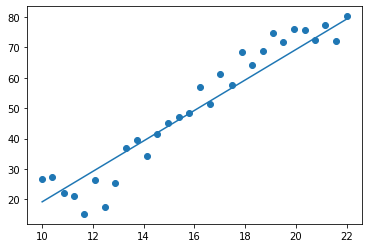

In [10]:
plt.scatter(data.Education,data.Income)
plt.plot(X.numpy(),(w*X+b).data.numpy())